### This Colab was deprecated July 2024.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [2]:
# Load dataset
file_path = "/content/House_price_data_california (1).csv"
df = pd.read_csv(file_path)


In [3]:
# Drop rows with missing target values for each classification task
df_clean = df.dropna(subset=['status', 'style', 'list_price'])

In [4]:
# Convert categorical target variables to numeric
label_encoders = {
    'status': LabelEncoder(),
    'style': LabelEncoder(),
    'price_range': LabelEncoder()
}


In [5]:
df_clean['status'] = label_encoders['status'].fit_transform(df_clean['status'])
df_clean['style'] = label_encoders['style'].fit_transform(df_clean['style'])

<ipython-input-5-60168b3f38d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['status'] = label_encoders['status'].fit_transform(df_clean['status'])
<ipython-input-5-60168b3f38d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['style'] = label_encoders['style'].fit_transform(df_clean['style'])


In [6]:
# Create price range categories
df_clean['price_range'] = pd.qcut(df_clean['list_price'], q=3, labels=['Low', 'Medium', 'High'])
df_clean['price_range'] = label_encoders['price_range'].fit_transform(df_clean['price_range'])


<ipython-input-6-333800729adb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['price_range'] = pd.qcut(df_clean['list_price'], q=3, labels=['Low', 'Medium', 'High'])
<ipython-input-6-333800729adb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['price_range'] = label_encoders['price_range'].fit_transform(df_clean['price_range'])


In [7]:
# Selecting features for classification tasks
features = ['beds', 'full_baths', 'sqft', 'year_built', 'lot_sqft', 'stories', 'price_per_sqft']
df_clean = df_clean.dropna(subset=features)  # Drop rows with missing feature values

In [8]:
X = df_clean[features]
y_status = df_clean['status']
y_style = df_clean['style']
y_price_range = df_clean['price_range']

In [9]:
# Standardizing numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
# Splitting into train and test sets
X_train_status, X_test_status, y_train_status, y_test_status = train_test_split(X_scaled, y_status, test_size=0.2, random_state=42)
X_train_style, X_test_style, y_train_style, y_test_style = train_test_split(X_scaled, y_style, test_size=0.2, random_state=42)
X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(X_scaled, y_price_range, test_size=0.2, random_state=42)

In [11]:
# Train models
models = {
    'status': RandomForestClassifier(random_state=42),
    'style': RandomForestClassifier(random_state=42),
    'price_range': RandomForestClassifier(random_state=42)
}


In [12]:
models['status'].fit(X_train_status, y_train_status)
models['style'].fit(X_train_style, y_train_style)
models['price_range'].fit(X_train_price, y_train_price)

RandomForestClassifier(random_state=42)

In [13]:
# Predictions
y_pred_status = models['status'].predict(X_test_status)
y_pred_style = models['style'].predict(X_test_style)
y_pred_price = models['price_range'].predict(X_test_price)

In [14]:
# Evaluation
accuracy_status = accuracy_score(y_test_status, y_pred_status)
accuracy_style = accuracy_score(y_test_style, y_pred_style)
accuracy_price = accuracy_score(y_test_price, y_pred_price)

In [15]:
classification_reports = {
    'status': classification_report(y_test_status, y_pred_status, target_names=label_encoders['status'].classes_),
    'style': classification_report(y_test_style, y_pred_style, target_names=label_encoders['style'].classes_),
    'price_range': classification_report(y_test_price, y_pred_price, target_names=label_encoders['price_range'].classes_)
}

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [16]:
# Print results
print(f"Property Status Classification Accuracy: {accuracy_status:.4f}")
print(classification_reports['status'])

print(f"Property Style Classification Accuracy: {accuracy_style:.4f}")
print(classification_reports['style'])

print(f"Price Range Classification Accuracy: {accuracy_price:.4f}")
print(classification_reports['price_range'])


Property Status Classification Accuracy: 0.9409
              precision    recall  f1-score   support

  CONTINGENT       0.00      0.00      0.00         3
    FOR_RENT       0.94      1.00      0.97      1340
     PENDING       0.00      0.00      0.00        79

    accuracy                           0.94      1422
   macro avg       0.31      0.33      0.32      1422
weighted avg       0.89      0.94      0.91      1422

Property Style Classification Accuracy: 0.7616
                precision    recall  f1-score   support

     APARTMENT       0.59      0.43      0.50       132
        CONDOS       0.72      0.68      0.70       287
          COOP       0.67      0.67      0.67         3
DUPLEX_TRIPLEX       0.38      0.24      0.30        45
        MOBILE       0.00      0.00      0.00         5
  MULTI_FAMILY       0.00      0.00      0.00         1
 SINGLE_FAMILY       0.83      0.92      0.87       849
     TOWNHOMES       0.49      0.40      0.44       100

      accuracy    

In [17]:
# Drop rows with missing target values for each classification task
df_clean = df.dropna(subset=['status', 'style', 'list_price'])

In [18]:
# Convert categorical target variables to numeric
label_encoders = {
    'status': LabelEncoder(),
    'style': LabelEncoder(),
    'price_range': LabelEncoder()
}


In [19]:
df_clean['status'] = label_encoders['status'].fit_transform(df_clean['status'])
df_clean['style'] = label_encoders['style'].fit_transform(df_clean['style'])

<ipython-input-19-60168b3f38d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['status'] = label_encoders['status'].fit_transform(df_clean['status'])
<ipython-input-19-60168b3f38d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['style'] = label_encoders['style'].fit_transform(df_clean['style'])


In [20]:
# Create price range categories
df_clean['price_range'] = pd.qcut(df_clean['list_price'], q=3, labels=['Low', 'Medium', 'High'])
df_clean['price_range'] = label_encoders['price_range'].fit_transform(df_clean['price_range'])

<ipython-input-20-333800729adb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['price_range'] = pd.qcut(df_clean['list_price'], q=3, labels=['Low', 'Medium', 'High'])
<ipython-input-20-333800729adb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['price_range'] = label_encoders['price_range'].fit_transform(df_clean['price_range'])


In [21]:
# Selecting features for classification tasks
features = ['beds', 'full_baths', 'sqft', 'year_built', 'lot_sqft', 'stories', 'price_per_sqft']
df_clean = df_clean.dropna(subset=features)  # Drop rows with missing feature values


In [22]:
X = df_clean[features]
y_status = df_clean['status']
y_style = df_clean['style']
y_price_range = df_clean['price_range']

In [23]:
# Standardizing numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
# Splitting into train and test sets
X_train_status, X_test_status, y_train_status, y_test_status = train_test_split(X_scaled, y_status, test_size=0.2, random_state=42)
X_train_style, X_test_style, y_train_style, y_test_style = train_test_split(X_scaled, y_style, test_size=0.2, random_state=42)
X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(X_scaled, y_price_range, test_size=0.2, random_state=42)

In [25]:
# Train models
models = {
    'status': RandomForestClassifier(random_state=42),
    'style': RandomForestClassifier(random_state=42),
    'price_range': RandomForestClassifier(random_state=42)
}


In [26]:
models['status'].fit(X_train_status, y_train_status)
models['style'].fit(X_train_style, y_train_style)
models['price_range'].fit(X_train_price, y_train_price)


RandomForestClassifier(random_state=42)

In [27]:
# Predictions
y_pred_status = models['status'].predict(X_test_status)
y_pred_style = models['style'].predict(X_test_style)
y_pred_price = models['price_range'].predict(X_test_price)

In [28]:
# Evaluation
accuracy_status = accuracy_score(y_test_status, y_pred_status)
accuracy_style = accuracy_score(y_test_style, y_pred_style)
accuracy_price = accuracy_score(y_test_price, y_pred_price)

In [29]:
classification_reports = {
    'status': classification_report(y_test_status, y_pred_status, target_names=label_encoders['status'].classes_),
    'style': classification_report(y_test_style, y_pred_style, target_names=label_encoders['style'].classes_),
    'price_range': classification_report(y_test_price, y_pred_price, target_names=label_encoders['price_range'].classes_)
}


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [30]:
# Print results
print(f"Property Status Classification Accuracy: {accuracy_status:.4f}")
print(classification_reports['status'])

Property Status Classification Accuracy: 0.9409
              precision    recall  f1-score   support

  CONTINGENT       0.00      0.00      0.00         3
    FOR_RENT       0.94      1.00      0.97      1340
     PENDING       0.00      0.00      0.00        79

    accuracy                           0.94      1422
   macro avg       0.31      0.33      0.32      1422
weighted avg       0.89      0.94      0.91      1422



In [31]:
print(f"Property Style Classification Accuracy: {accuracy_style:.4f}")
print(classification_reports['style'])

Property Style Classification Accuracy: 0.7616
                precision    recall  f1-score   support

     APARTMENT       0.59      0.43      0.50       132
        CONDOS       0.72      0.68      0.70       287
          COOP       0.67      0.67      0.67         3
DUPLEX_TRIPLEX       0.38      0.24      0.30        45
        MOBILE       0.00      0.00      0.00         5
  MULTI_FAMILY       0.00      0.00      0.00         1
 SINGLE_FAMILY       0.83      0.92      0.87       849
     TOWNHOMES       0.49      0.40      0.44       100

      accuracy                           0.76      1422
     macro avg       0.46      0.42      0.43      1422
  weighted avg       0.74      0.76      0.75      1422



In [32]:
print(f"Price Range Classification Accuracy: {accuracy_price:.4f}")
print(classification_reports['price_range'])

Price Range Classification Accuracy: 0.8783
              precision    recall  f1-score   support

        High       0.93      0.92      0.92       574
         Low       0.88      0.86      0.87       331
      Medium       0.82      0.85      0.83       517

    accuracy                           0.88      1422
   macro avg       0.88      0.87      0.88      1422
weighted avg       0.88      0.88      0.88      1422



In [33]:
# Drop rows with missing target values for each classification task
df_clean = df.dropna(subset=['status', 'style', 'list_price'])

In [34]:
# Convert categorical target variables to numeric
label_encoders = {
    'status': LabelEncoder(),
    'style': LabelEncoder(),
    'price_range': LabelEncoder()
}

In [35]:
df_clean['status'] = label_encoders['status'].fit_transform(df_clean['status'])
df_clean['style'] = label_encoders['style'].fit_transform(df_clean['style'])


<ipython-input-35-60168b3f38d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['status'] = label_encoders['status'].fit_transform(df_clean['status'])
<ipython-input-35-60168b3f38d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['style'] = label_encoders['style'].fit_transform(df_clean['style'])


In [ ]:
# Create price range categories
df_clean['price_range'] = pd.qcut(df_clean['list_price'], q=3, labels=['Low', 'Medium', 'High'])
df_clean['price_range'] = label_encoders['price_range'].fit_transform(df_clean['price_range'])

In [36]:
# Selecting features for classification tasks
features = ['beds', 'full_baths', 'sqft', 'year_built', 'lot_sqft', 'stories', 'price_per_sqft']
df_clean = df_clean.dropna(subset=features)  # Drop rows with missing feature values

In [37]:
# Splitting dataset into three incremental parts for Muller loop
df_part1 = df_clean[:len(df_clean)//3]
df_part2 = df_clean[:2*len(df_clean)//3]
df_part3 = df_clean

In [38]:
# Function to train and evaluate model on a dataset
def train_and_evaluate(df_subset, label, features):
    X_subset = df_subset[features]
    y_subset = df_subset[label]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_subset)

    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_subset, test_size=0.2, random_state=42)

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    return accuracy



In [39]:

# Running the Muller loop on incremental datasets
accuracy_part1 = train_and_evaluate(df_part1, 'status', features)
accuracy_part2 = train_and_evaluate(df_part2, 'status', features)
accuracy_part3 = train_and_evaluate(df_part3, 'status', features)

In [40]:
# Compare results in a table format
performance_comparison = pd.DataFrame({
    "Dataset": ["ds1", "ds1+ds2", "ds1+ds2+ds3"],
    "Accuracy": [accuracy_part1, accuracy_part2, accuracy_part3]
})

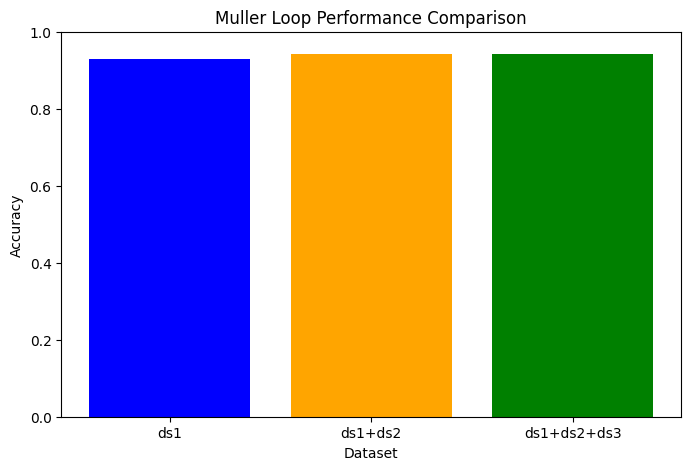

In [41]:
# Visualization of performance improvement
plt.figure(figsize=(8,5))
plt.bar(performance_comparison["Dataset"], performance_comparison["Accuracy"], color=['blue', 'orange', 'green'])
plt.xlabel("Dataset")
plt.ylabel("Accuracy")
plt.title("Muller Loop Performance Comparison")
plt.ylim(0, 1)
plt.show()


In [42]:
# Print results
print(performance_comparison)

       Dataset  Accuracy
0          ds1  0.930380
1      ds1+ds2  0.943038
2  ds1+ds2+ds3  0.940928
